<a href="https://colab.research.google.com/github/sasamori-takuya/study_group_materials/blob/master/optimization/03_grad_desc_Wolf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wolf ルールとバックトラック法による最急降下法

**[step0]**  
Define initial_value, $\boldsymbol{x}_0 \in \mathbb{R}^n$.  
Define stop threshold, $\epsilon > 0$.  
Set number of updates, $k=0$.  
Set initial_value in Wolf rule, $\alpha>0$.  
Set constant of Armijo condition in Wolf rule, $c_1 \in (0,1)$.  
Set constant of curvature condition in Wolf rule, $c_2 \in (c_1, 1)$.  
Set learning rate of backtracking in Wolf rule, $\rho \in (0, 1)$.
   
**[step1]**  
Repeat the following algorithm for $k \geq 0$ until there exists $k$ satisfying $\|\nabla f(\boldsymbol{x}_k)\| < \epsilon$: 
> Set $\alpha_0 := \alpha$.  
> Repeat $(*)$ for $j \geq 1$ until there exists $j$ satisfying the following two conditions:
\begin{align*}
  &f(\boldsymbol{x}_k - \alpha_j \nabla f(\boldsymbol{x}_k)) \leq f(\boldsymbol{x}_k) - c_1 \alpha_j \|\nabla f(\boldsymbol{x}_k)\|^2 \tag{Armijo condition}\\
  &\dfrac{d}{d \alpha} f(\boldsymbol{x}_k - \alpha \nabla f(\boldsymbol{x}_k)) \biggm|_{\alpha=\alpha_j} \geq c_2 \dfrac{d}{d \alpha} f(\boldsymbol{x}_k - \alpha \nabla f(\boldsymbol{x}_k)) \biggm|_{\alpha=0} \tag{curvature condition}
\end{align*}
>> $\alpha_j = \rho \alpha_{j-1} \quad (*)$  
  
> we find $J$.  
> Set $\alpha_k = \rho^J \alpha_0 = \rho^J \alpha$.  
> Set $\boldsymbol{x}_{k+1} = \boldsymbol{x}_k - \alpha_k \nabla f(\boldsymbol{x}_k)$. 

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import sys
#import time

print(sys.version)
print(np.__version__)

3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
1.18.4


In [0]:
class WolfGradientDescent:
  def __init__(self,
               fct,
               grad,
               alpha = 1.0,
               const_armijo = 0.0001,
               const_curv = 0.9,
               lr = 0.9,
               thres = 1e-6,
               iter_max = 1000
               ):
    self.fct = fct                           # 目的関数
    self.grad = grad                         # 目的関数の勾配
    self.alpha = alpha                       # Wolf rule の初期値
    self.const_armijo  = const_armijo        # Wolf ruleの定数c1(Armijo条件)
    self.const_curv  = const_curv            # Wolf ruleの定数c2(曲率条件)
    self.lr = lr                             # Wolf ruleのバックトラック法の更新レート
    self.thres = thres                       # 更新停止の閾値
    self.iter_max = iter_max                 # 最大反復回数
    self.path = None                         # 解の点列
  
  def minimize(self, x):
    path = [x]
    
    for i in range(self.iter_max):
      iter_count = i + 1  # 最初の0回目の分がある
      grad = self.grad(x)
      
      if np.linalg.norm(grad, ord = 2, axis = None) < self.thres:
        break
      else:
        alpha = self.alpha
        const_armijo = self.const_armijo
        const_curv = self.const_curv
        lr = self.lr
        h = 1e-2  # 1e-3だと（恐らく）数値微分の計算が収束しなくてwhileがいつまで経っても終わらなかった
        derivative = (self.fct(x - (alpha + h) * grad) - self.fct(x - (alpha - h) * grad)) / (2 * h)
        derivative_zero = (self.fct(x - h * grad) - self.fct(x + h * grad)) / (2 * h)
        condition_armijo = (self.fct(x - alpha * grad) > (self.fct(x) - const_armijo * alpha * np.dot(grad, grad)))
        condition_curv = (derivative < const_curv * derivative_zero)
        
        while condition_armijo or condition_curv:
          alpha = lr * alpha
        
        x = x - alpha * grad
        path.append(x)
    
    self.iter_count = iter_count  # 反復回数
    self.opt_pt = x               # 最適解
    self.opt_val = self.fct(x)    # 関数の最小値
    self.path = np.array(path)    # 探索解の推移

In [0]:
def f(x):
  return 0.5 * x[0]**4 - 2 * x[0]**2 * x[1] + 4 * x[1]**2 + 8 * x[0] + 8 * x[1]

def grad_f(x):
  grad_1 = 2 * x[0]**3 - 4 * x[0] * x[1] + 8
  grad_2 = - 2 * x[0]**2 + 8 * x[1] + 8
  return np.array([grad_1, grad_2])

iter.cnt. = 62
theor.opt.pt. = [-1.3647 -0.5344]
theor.opt.val. = -10.325648708973457
emp.opt.pt. = [-1.36465551 -0.53442892]
emp.opt.val. = -10.325648718429083


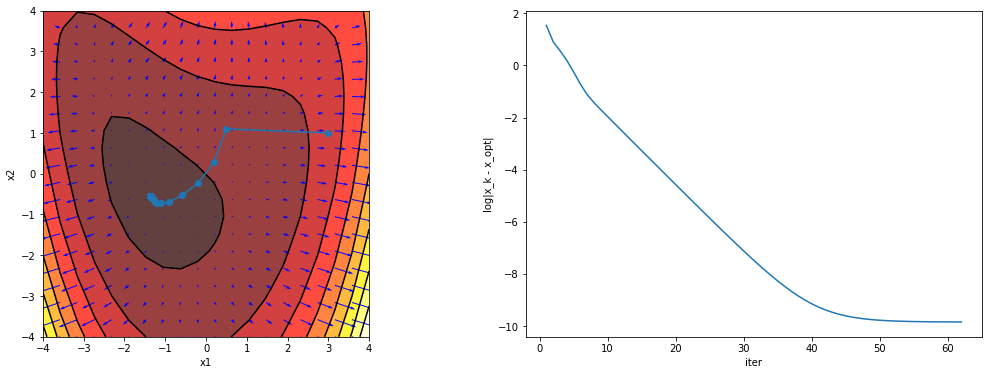

In [4]:
alpha = 0.05
const_armijo = 0.3
const_curv = 0.9
lr = 0.9
thres = 1e-6
iter_max = 1000
ini_val = np.array([3.0, 1.0])

x1 = np.linspace(-4, 4, 20)  # x1.shape = (20, )
x2 = np.linspace(-4, 4, 20)  # x2.shape = (20, )
X1, X2 = np.meshgrid(x1, x2)  # X1.shape = (20, 20), X2.shape = (20, 20)
X = np.array([X1, X2])  # X.shape = (2, 20, 20)
Z = f(X)  # Z.shape = (20, 20)
gradient = grad_f(X)  # gradiend.shape = (2, 20, 20)
grad_x1 = gradient[0] # grad_x1.shape = (20, 20)
grad_x2 = gradient[1] # grad_x2.shape = (20, 20)

wgd = WolfGradientDescent(f, grad_f, alpha, const_armijo, const_curv, lr, thres, iter_max)
wgd.minimize(ini_val)
path = wgd.path

theor_opt_pt = np.array([-1.3647, -0.5344])
abs_path = np.array([np.log(np.linalg.norm(path[i, :] - theor_opt_pt)) for i in range(path.shape[0])])
iter_path = np.arange(1, path.shape[0] + 1)

print("iter.cnt. = {}".format(wgd.iter_count))
print("theor.opt.pt. = {}".format(theor_opt_pt))
print("theor.opt.val. = {}".format(f(theor_opt_pt)))
print("emp.opt.pt. = {}".format(wgd.opt_pt))
print("emp.opt.val. = {}".format(wgd.opt_val))

fig = plt.figure(figsize=(18, 6))
axL = fig.add_subplot(1, 2, 1)
axL.contourf(x1, x2, Z, 10, alpha = .75, cmap = plt.cm.hot)
axL.contour(x1, x2, Z, levels = 10, colors = "black")
axL.quiver(x1, x2 , grad_x1, grad_x2, color = "blue")
axL.plot(path[:,0], path[:,1], marker = "o")
axL.set_xlabel("x1")
axL.set_ylabel("x2")
axL.set_aspect('equal')

axR = fig.add_subplot(1, 2, 2)
axR.set_xlabel("iter")
axR.set_ylabel("log|x_k - x_opt|")
axR.plot(iter_path, abs_path)

plt.show()